In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Show Dataframe

In [2]:
df = pd.read_csv('../../src/data/preprocessed/test.csv', index_col=0)
df.head()

,distance,discovery_year,stellar_magnitude,mass_E,orbital_days,planet_type,eccentricity,radius_E,log_mass,log_distance,log_orbital,log_radius
0,304.0,2007.0,4.72307,6165.320,326.0,3.0,0.23,12.105612,8.726695,5.717028,5.786897,2.493669
1,409.0,2009.0,5.01300,4684.372,1.4,3.0,0.08,12.217701,8.451987,6.013715,0.336472,2.502886
2,246.0,2008.0,5.23133,1525.440,185.8,3.0,0.00,12.890235,7.330038,5.505332,5.224671,2.556470
3,58.0,2002.0,6.61935,1480.948,4.9,3.0,0.37,12.890235,7.300438,4.060443,1.589235,2.556470
4,69.0,1996.0,6.21500,565.684,2.2,3.0,0.68,13.450680,6.338036,4.234107,0.788457,2.599030


In [3]:
df.columns

Index(['distance', 'discovery_year', 'stellar_magnitude', 'mass_E',
       'orbital_days', 'planet_type', 'eccentricity', 'radius_E', 'log_mass',
       'log_distance', 'log_orbital', 'log_radius'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5039 entries, 0 to 5038
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           5039 non-null   float64
 1   discovery_year     5039 non-null   float64
 2   stellar_magnitude  5039 non-null   float64
 3   mass_E             5039 non-null   float64
 4   orbital_days       5039 non-null   float64
 5   planet_type        5039 non-null   float64
 6   eccentricity       5039 non-null   float64
 7   radius_E           5039 non-null   float64
 8   log_mass           5039 non-null   float64
 9   log_distance       5039 non-null   float64
 10  log_orbital        5039 non-null   float64
 11  log_radius         5039 non-null   float64
dtypes: float64(12)
memory usage: 511.8 KB


In [5]:
df.describe()

,distance,discovery_year,stellar_magnitude,mass_E,orbital_days,planet_type,eccentricity,radius_E,log_mass,log_distance,log_orbital,log_radius
count,5039.000000,5039.000000,5039.000000,5039.000000,5.039000e+03,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000
mean,2157.475293,2015.455448,12.901239,442.039684,5.294558e+02,1.913872,0.053554,5.536681,2.993945,6.929876,2.393490,1.273755
std,3070.033462,4.209522,3.165151,3888.340308,1.715171e+04,0.867871,0.130032,5.312977,2.365482,1.420138,1.514778,0.927298
min,4.000000,1989.000000,0.872000,0.020000,1.000000e-01,0.000000,0.000000,0.296000,-3.912023,1.386294,-2.302585,-1.217396
25%,441.000000,2014.000000,11.371000,3.860000,3.800000e+00,1.000000,0.000000,1.730000,1.350667,6.089045,1.335001,0.548121
50%,1445.000000,2016.000000,13.704000,8.200000,8.800000e+00,2.000000,0.000000,2.690136,2.104134,7.275865,2.174752,0.989592
75%,2810.500000,2018.000000,15.102000,135.700600,2.360000e+01,3.000000,0.030000,11.270549,4.910448,7.941118,3.161247,2.422193
max,27727.000000,2022.000000,44.610000,238985.600000,1.101370e+06,3.000000,0.950000,77.341410,12.384159,10.230162,13.912065,4.348230


# Feature Enginiering

In [6]:
df['density'] = (df.mass_E * (5.972*10**24)) / (4/3 * np.pi * ((df.radius_E * 6371000) ** 3))
df['log_density'] = np.log(df.density) 

In [7]:
data = df.copy()

In [8]:
target = data['planet_type']

# Drop Categorical Columns

In [9]:
data = data.drop(['planet_type'], axis=1)

# Drop Features

In [10]:
# deep_data = data.drop(['log_distance', 'distance'], axis=1)

# EDA

<AxesSubplot:>

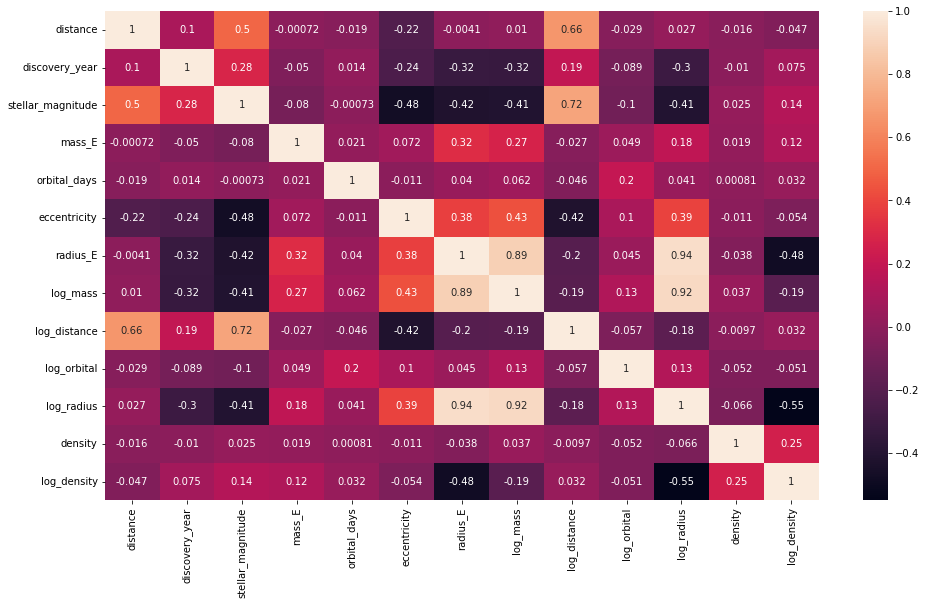

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True)

# Baseline Model

In [12]:
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(max_depth=3)
ada = AdaBoostClassifier(base_estimator = estimator, n_estimators=200, learning_rate=0.5, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(max_depth=3, n_estimators=100, random_state=42)

from xgboost import XGBRFClassifier
xgb = XGBRFClassifier(random_state=42)

from lightgbm import LGBMClassifier
lgb = LGBMClassifier()

from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose=0)

c:\Users\Paris\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Grid Search

In [14]:
from sklearn.model_selection import KFold, GridSearchCV

cv = KFold(n_splits=10, random_state=None, shuffle=True)

params = {'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'max_leaf_nodes' : [10,16,20],
 'n_estimators': [200, 500, 1000]}
clf = GridSearchCV(estimator = forest, param_grid = params, scoring='accuracy', cv=cv)

In [15]:
# clf.fit(data,target)

In [16]:
# clf.best_params_
# clf.best_estimator_
# clf.score(data,target)

# Voting

In [17]:
from sklearn.ensemble import VotingClassifier
estimators = [('forest', forest), ('xgb', xgb)]
voting = VotingClassifier(estimators=estimators, voting='soft')

In [18]:
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
accuracy_score(y_pred, y_test)

c:\Users\Paris\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Paris\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:45:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Paris\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.9930555555555556

In [19]:
models = [log, tree, forest, ada, gbct, cat, lgb, xgb, voting]
names = ['Logistic', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'CatBoost', 'Lightgbm', 'XGBoost', 'Voting(RF+XGB)', 'MLP']
scores = []
predictions = {}
for idx, model in enumerate(models):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    predictions[names[idx]] = y_pred
    scores.append(accuracy_score(y_pred, y_test))

c:\Users\Paris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Paris\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Paris\anaconda3\lib\sit

[19:45:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Paris\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Paris\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:45:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Paris\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [20]:
from sklearn.preprocessing import StandardScaler
scal_names = ['orbital_days','distance','stellar_magnitude','eccentricity','radius_E','mass_E','density']
X_scal_train = StandardScaler().fit_transform(X_train.loc[:,['orbital_days','distance','stellar_magnitude','eccentricity','radius_E','mass_E','density']])
X_scal_test = StandardScaler().fit_transform(X_test.loc[:,['orbital_days','distance','stellar_magnitude','eccentricity','radius_E','mass_E','density']])

log_names = ['log_distance','log_orbital','log_radius','log_mass','log_density']
X_log_train = StandardScaler().fit_transform(X_train.loc[:,log_names])
X_log_test = StandardScaler().fit_transform(X_test.loc[:,log_names])

X_train_scal = pd.concat([pd.DataFrame(X_log_train,columns=log_names), pd.DataFrame(X_scal_train, columns=scal_names)], axis=1)
X_test_scal = pd.concat([pd.DataFrame(X_log_test,columns=log_names), pd.DataFrame(X_scal_test, columns=scal_names)], axis=1)

In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_log_train, y_train)
scores.append(mlp.score(X_log_test, y_test))
# scores[-1] = mlp.score(X_log_test, y_test)

c:\Users\Paris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Evaluate

In [22]:
pd.DataFrame(scores, index=names, columns=['Accuracy']).sort_values(by='Accuracy', ascending=False)

,Accuracy
Voting(RF+XGB),0.993056
XGBoost,0.991071
Random Forest,0.990079
CatBoost,0.990079
Lightgbm,0.990079
Gradient Boosting,0.989087
Decision Tree,0.983135
AdaBoost,0.976190
MLP,0.967262
Logistic,0.782738


In [23]:
cm = confusion_matrix(predictions['Voting(RF+XGB)'],y_test)
cm

array([[ 41,   1,   0,   0],
       [  0, 323,   3,   0],
       [  0,   3, 338,   0],
       [  0,   0,   0, 299]], dtype=int64)

In [24]:
pct = []
for i in cm:
    for j in i:
        pct.append((j*100/i.sum()).round(2))
cm_pct = np.array(pct).reshape(4,4)


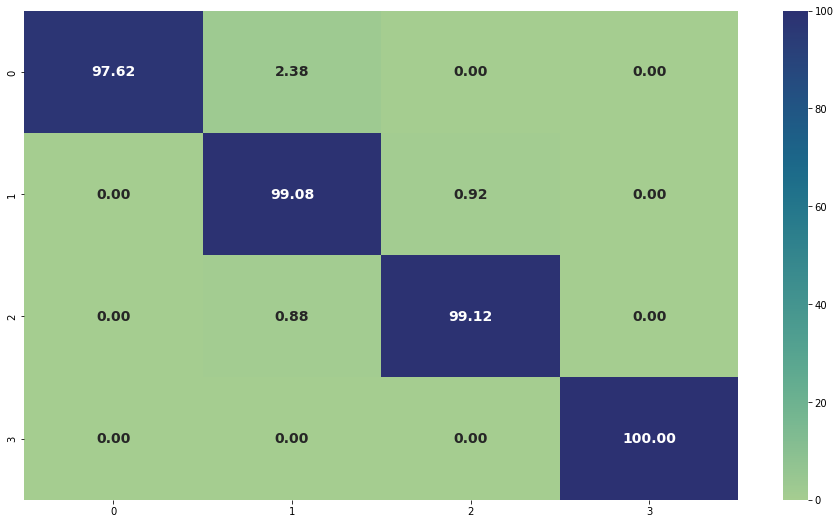

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(cm_pct, annot=True,fmt=".2f", annot_kws=({'fontsize': 14,'fontweight': 'bold'}), cmap='crest');
plt.savefig('../utils/heatmap.jpg')

# Feature Importance

In [26]:
df_feature = pd.DataFrame(cat.get_feature_importance(), index=data.columns, columns=['feature_importance']).sort_values(by='feature_importance', ascending=False)
df_feature

,feature_importance
mass_E,18.413053
radius_E,16.013267
log_mass,15.490707
density,14.554014
log_radius,13.359952
log_density,7.157936
discovery_year,3.594351
stellar_magnitude,2.961400
orbital_days,2.786814
log_orbital,1.643026


In [27]:
df_feature = pd.DataFrame(forest.feature_importances_*100/forest.feature_importances_.sum(), index=data.columns, columns=['feature_importance']).sort_values(by='feature_importance', ascending=False)
df_feature

,feature_importance
mass_E,18.657730
log_radius,18.447930
log_mass,18.030233
radius_E,17.751557
log_density,12.651777
density,11.815404
stellar_magnitude,0.688065
log_orbital,0.477039
discovery_year,0.473346
orbital_days,0.443425


In [28]:
df_feature = pd.DataFrame(xgb.feature_importances_*100/xgb.feature_importances_.sum(), columns=['Feature Importance'])

In [29]:
df_feature['Features'] = data.columns
df_feature = df_feature.sort_values(by='Feature Importance', ascending=False)
df_feature

,Feature Importance,Features
7,22.245237,log_mass
6,18.517599,radius_E
3,17.847845,mass_E
10,16.243778,log_radius
12,13.472301,log_density
11,10.448231,density
9,0.300022,log_orbital
8,0.213794,log_distance
4,0.176769,orbital_days
2,0.170428,stellar_magnitude


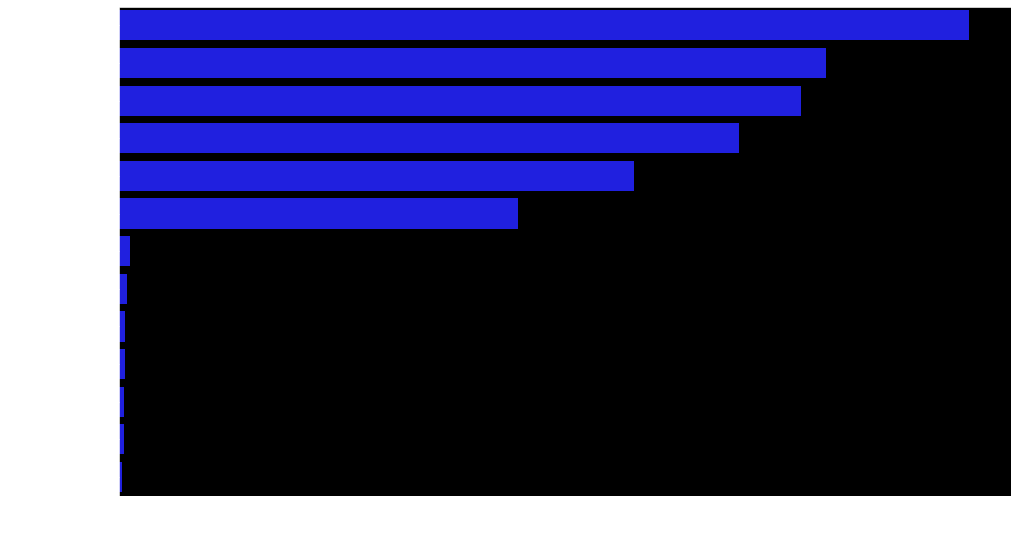

In [30]:
plt.figure(figsize=(16,9))
plt.style.use('dark_background')
sns.barplot(x="Feature Importance", y="Features", data=df_feature,
            label="Feature Importance", color="b")
plt.savefig('../utils/feature_barplot.jpg')

In [31]:
import keras
layers = [
    keras.layers.Dense(units = 300, activation='relu', input_shape = (5,)),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 4, activation='softmax')
]

model = keras.models.Sequential(layers)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=15)

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               1800      
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 32,304
Trainable params: 32,304
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(
    X_log_train,
    y_train,
    batch_size = 10,
    epochs = 100,
    validation_split = 0.1,
    callbacks=early_stopping_cb
)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.3578 - accuracy: 0.8861 - val_loss: 0.1763 - val_accuracy: 0.9356
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.1739 - accuracy: 0.9484 - val_loss: 0.1311 - val_accuracy: 0.9381
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.1386 - accuracy: 0.9518 - val_loss: 0.1145 - val_accuracy: 0.9356
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.1202 - accuracy: 0.9512 - val_loss: 0.0916 - val_accuracy: 0.9554
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.1077 - accuracy: 0.9603 - val_loss: 0.0830 - val_accuracy: 0.9703
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.1060 - accuracy: 0.9622 - val_loss: 0.0881 - val_accuracy: 0.9728
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.1016 - accuracy: 0.9608 - val_loss: 0.0774 - val_accuracy: 0.9703

In [34]:
model.evaluate(X_log_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9752


[0.0800432339310646, 0.9751983880996704]

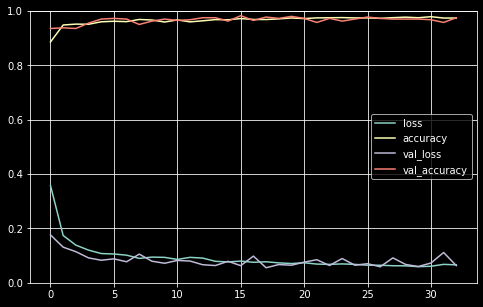

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# PCA Components

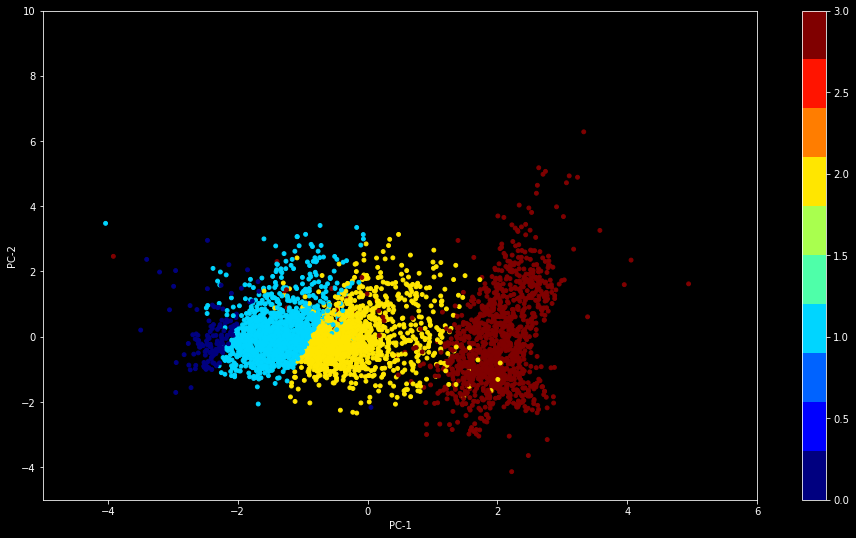

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_log_train)

# Reduce the image dimensions to  2 so that we can visualize the dataset using a Scatterplot.
plt.figure(figsize = (16,9))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 15, cmap = c_map , c = y_train)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.xlim(-5,6)
plt.ylim(-5,10)
plt.savefig('../utils/pca.jpg')

In [37]:
pca.explained_variance_ratio_

array([0.44730009, 0.20605012, 0.18871489, 0.1579349 ])

In [38]:
pca.explained_variance_ratio_.sum()

0.9999999999999998

# Save de model

In [39]:
import pickle
filename = '../model/my_model.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(voting, archivo_salida)